### Exercise 3.02: Implementing k-means Clustering
In this exercise, we will create four clusters from text documents in sklearn's fetch_20newsgroups text dataset using k-means clustering. We will compare these clusters with the actual categories and use the elbow method to obtain the optimal number of clusters.

In [2]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

import matplotlib.pyplot as plt

%matplotlib inline

import re

import string

from nltk import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from collections import Counter

from pylab import *

import nltk
nltk.download('stopwords')

nltk.download('punkt')

nltk.download('wordnet')

import warnings

warnings.filterwarnings('ignore')

import seaborn as sns

sns.set()

import numpy as np

from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/LNonyane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)
lemmatizer = WordNetLemmatizer()

In [4]:
categories = ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [5]:
news_data = fetch_20newsgroups(subset='train', \

                               categories=categories, \

                               shuffle=True, \

                               random_state=42, \

                               download_if_missing=True)

news_data_df = pd.DataFrame({'text' : news_data['data'], \

                             'category': news_data.target})

In [7]:
news_data_df['cleaned_text'] = news_data_df['text']\
.apply(lambda x : ' '.join\
([lemmatizer.lemmatize(word.lower()) \
for word in word_tokenize\
(re.sub(r'([^\s\w]|_)+', ' ', \
       str(x))) \
if word.lower() not in stop_words]))

create a TFIDF matrix and transform it into a DataFrame

In [8]:
tfidf_model = TfidfVectorizer(max_features=200)

tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense()) # todense() returns a matrix

tfidf_df.columns = sorted(tfidf_model.vocabulary_)

tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


Use the KMeans function of sklearn to create four clusters from a TFIDF representation of news articles.

In [9]:
kmeans = KMeans(n_clusters=4) # KMeans class instance

kmeans.fit(tfidf_df)

y_kmeans = kmeans.predict(tfidf_df)

news_data_df['obtained_clusters'] = y_kmeans

Use pandas' crosstab function to compare the clusters we have obtained with the actual categories of the news articles.

In [10]:
pd.crosstab(news_data_df['category']\
.replace({0:'misc.forsale', \
          1:'sci.electronics', \
          2:'talk.religion.misc'}),\
news_data_df['obtained_clusters']\
.replace({0 : 'cluster_1',\
          1 : 'cluster_2',\
          2 : 'cluster_3', \
          3: 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,1,157,93,334
sci.electronics,0,139,439,13
talk.religion.misc,193,73,111,0


Finally, to obtain the optimal value of k (that is, the number of clusters), execute the k-means algorithm for values of k ranging from 1 to 6. For each value of k, store the distortion—that is, the mean of the distances of the documents from their nearest cluster center. Look for the value of k where the slope of the plot changes rapidly.

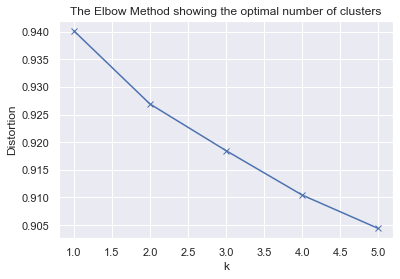

In [11]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k) # KMeans cluster instance
    kmeanModel.fit(tfidf_df)
    distortions.append(sum(np.min(cdist\
    (tfidf_df, kmeanModel.cluster_centers_, \
     'euclidean'), axis=1)) / tfidf_df.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number '\
          'of clusters')
plt.show()

From the preceding graph, we can conclude that the optimal number of clusters is 2.